In [1]:
#Unsupervised Learning Algorithm

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

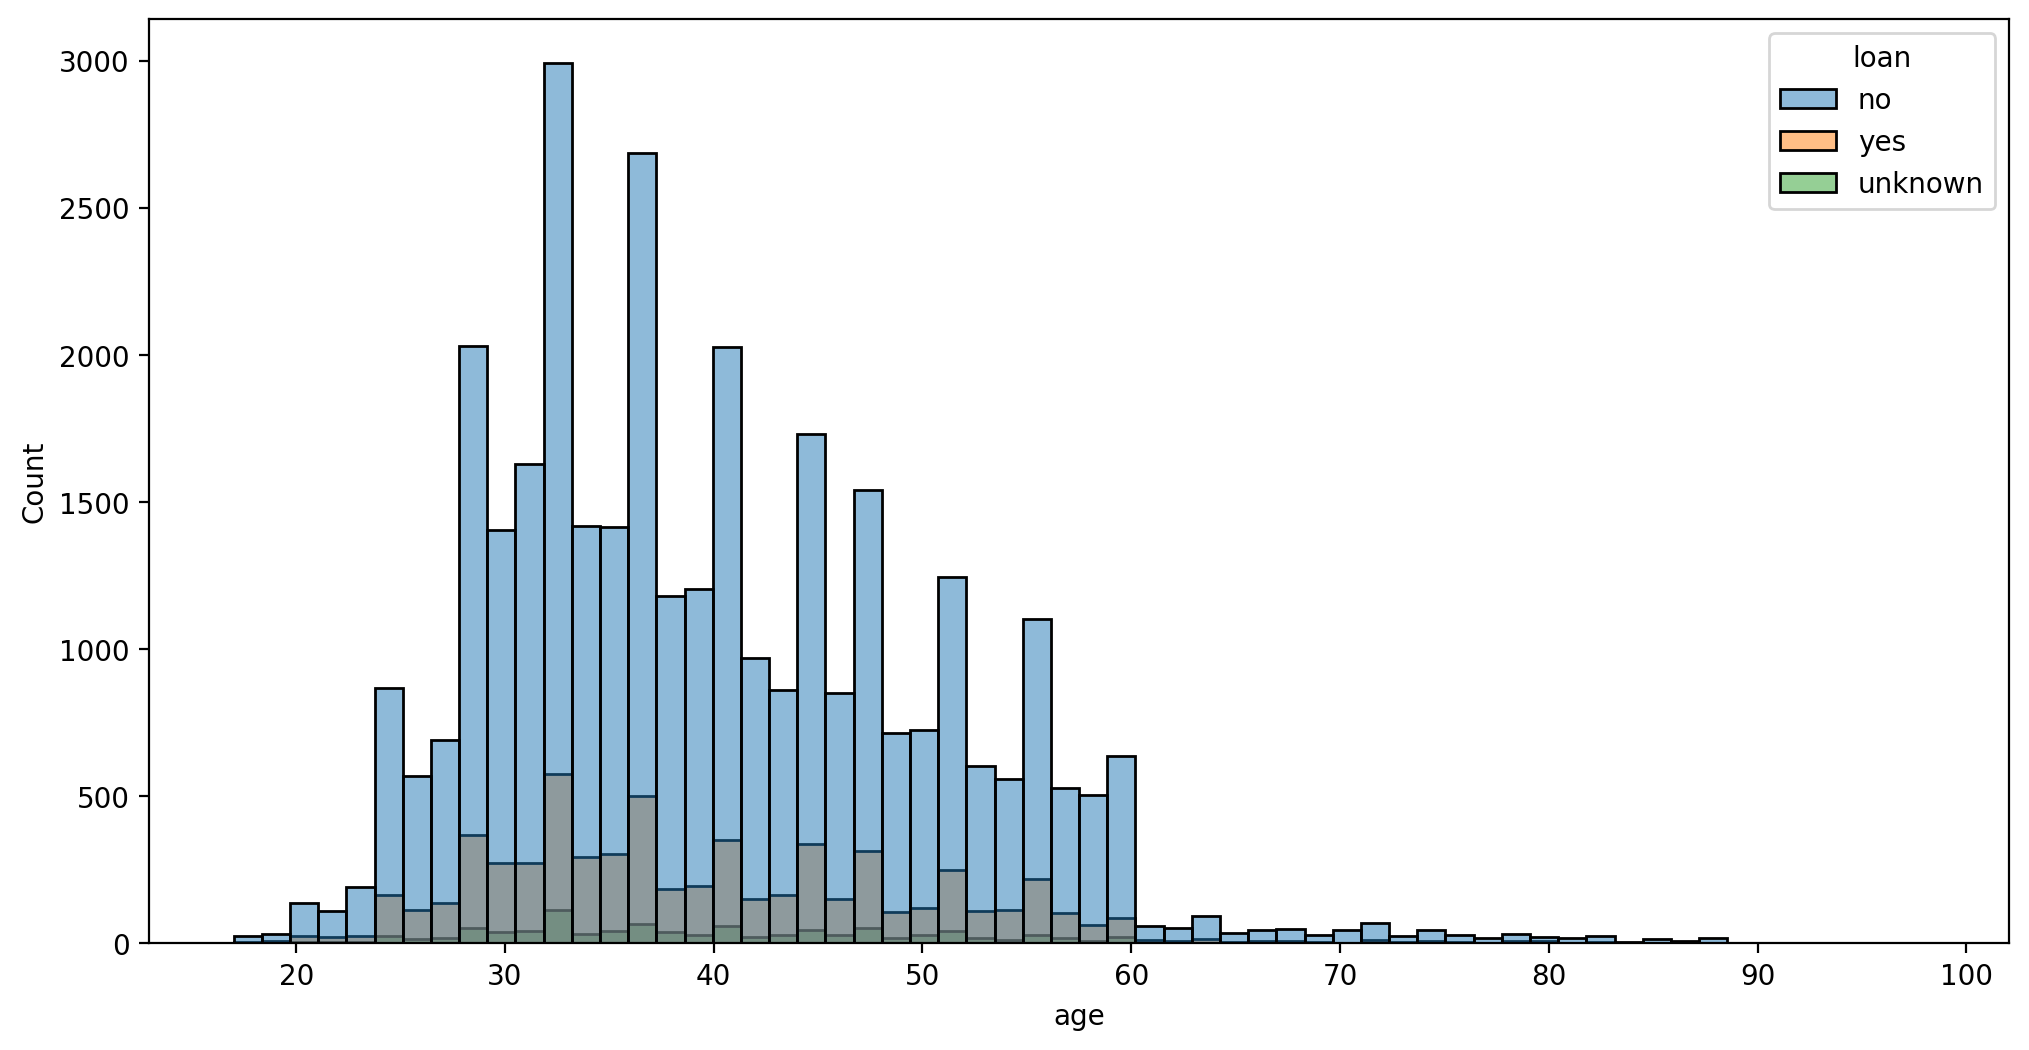

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',bins=60,hue='loan')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pdays', ylabel='Count'>

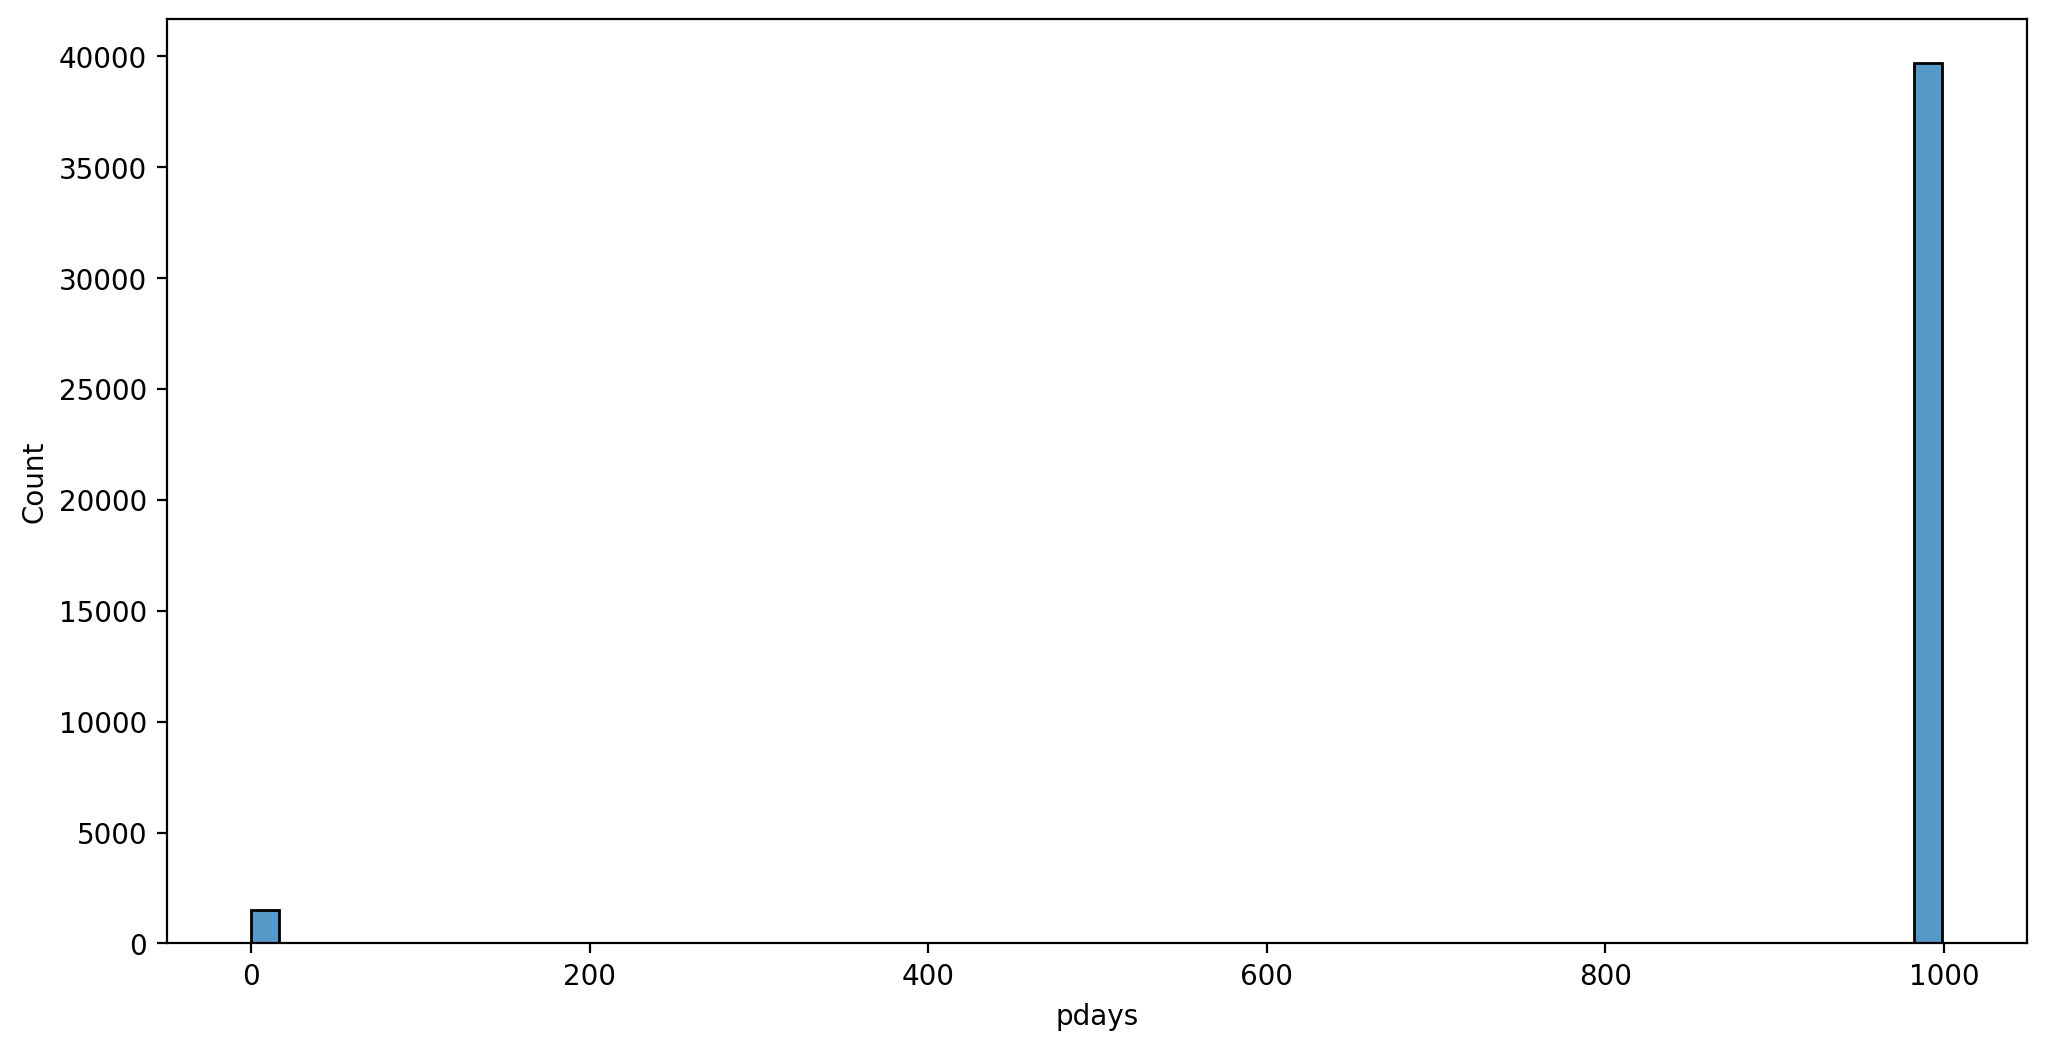

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays',bins=60)
#pdays means the no of people contacted after the campaign
#999 is the filler used if no contact is made

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pdays', ylabel='Count'>

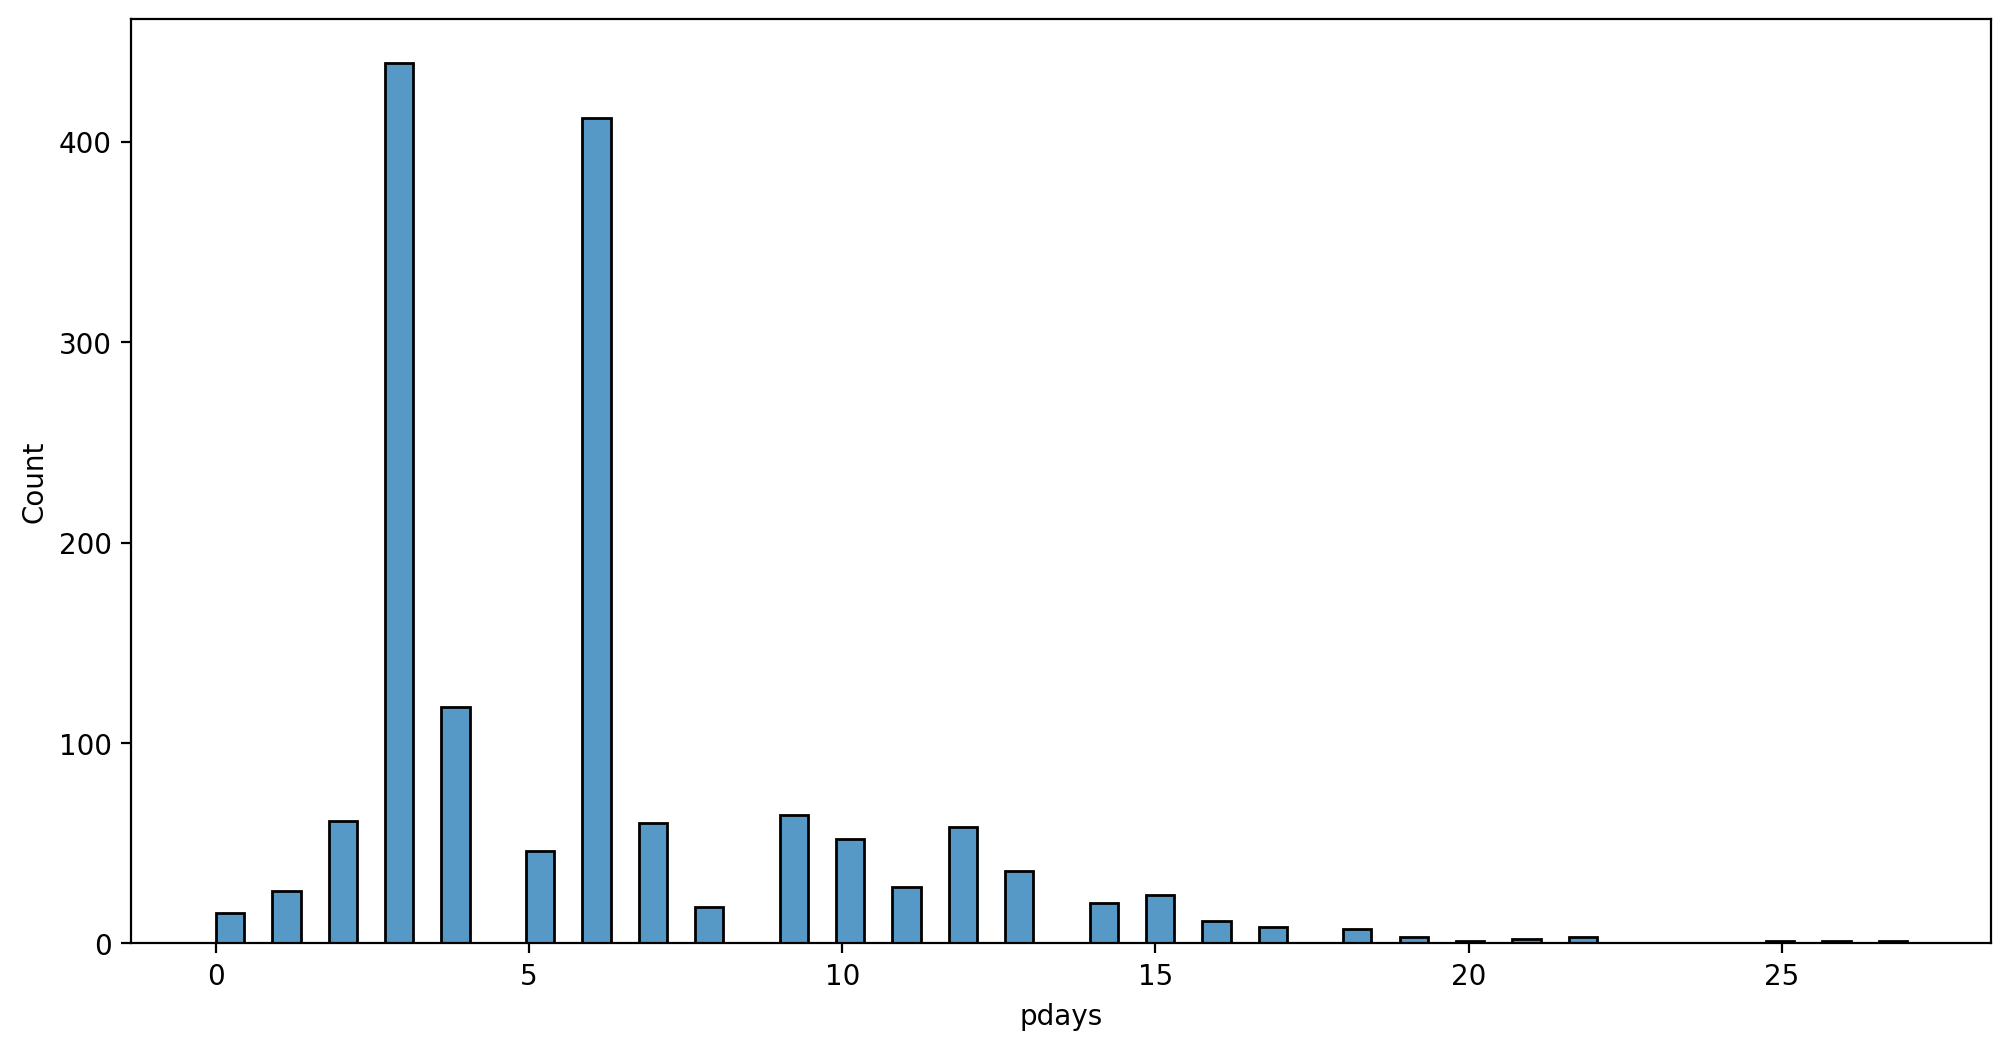

In [12]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays',bins=60)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 2000.0)

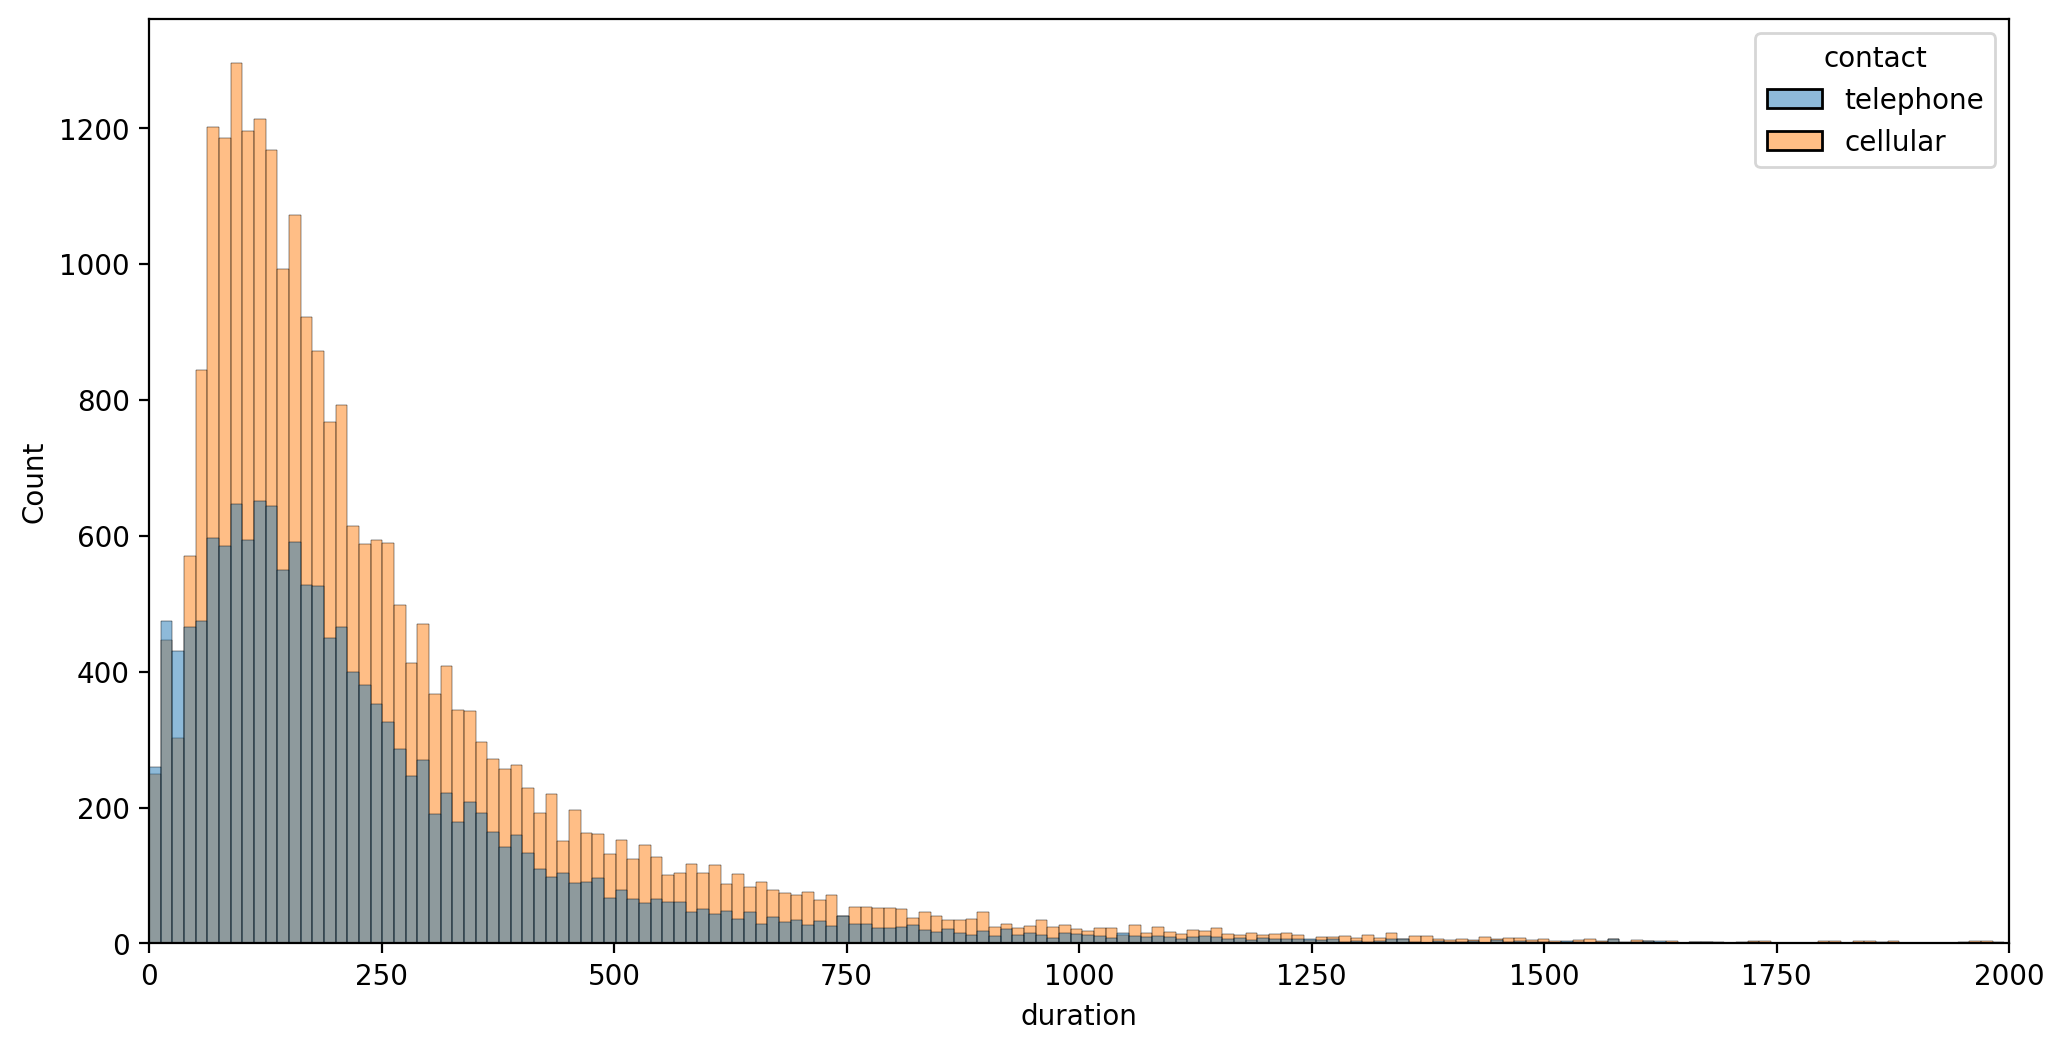

In [19]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000)

In [14]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

<Axes: xlabel='contact', ylabel='count'>

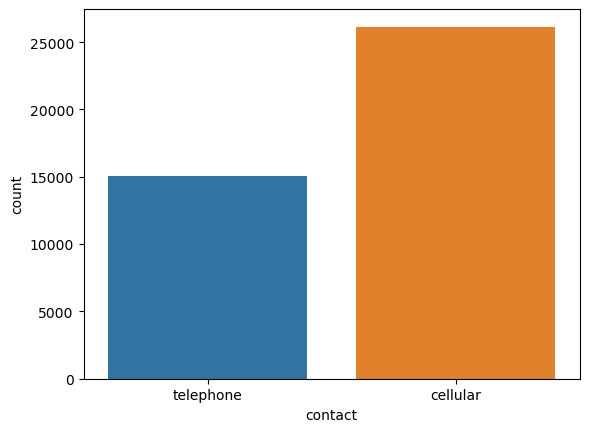

In [20]:
sns.countplot(data=df,x='contact')

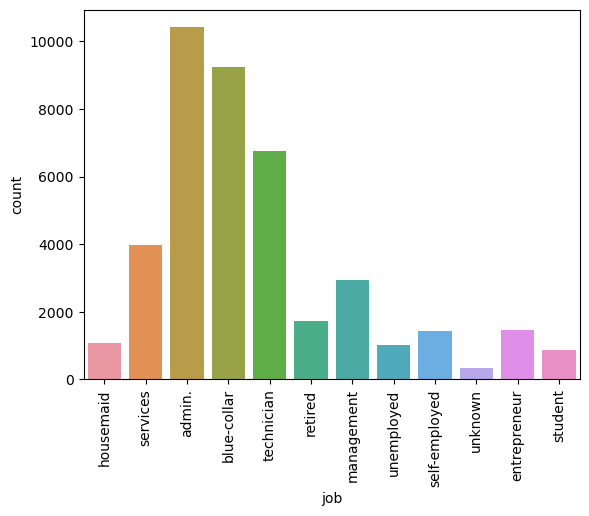

In [7]:
sns.countplot(data=df,x='job')
plt.xticks(rotation=90);

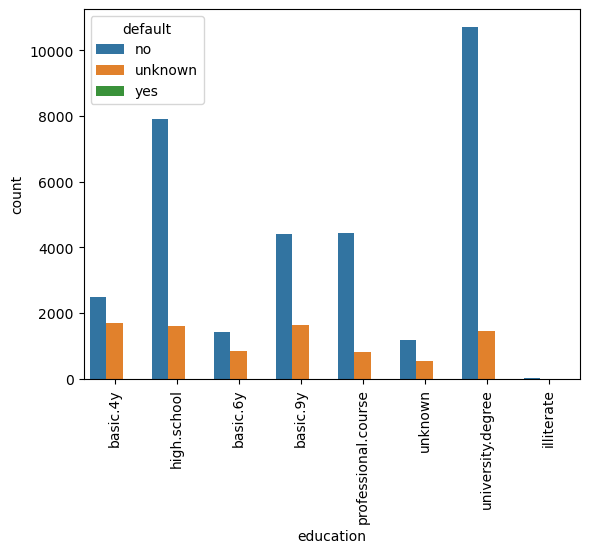

In [9]:
sns.countplot(data=df,x='education',hue='default')
plt.xticks(rotation=90);

<Axes: xlabel='default', ylabel='count'>

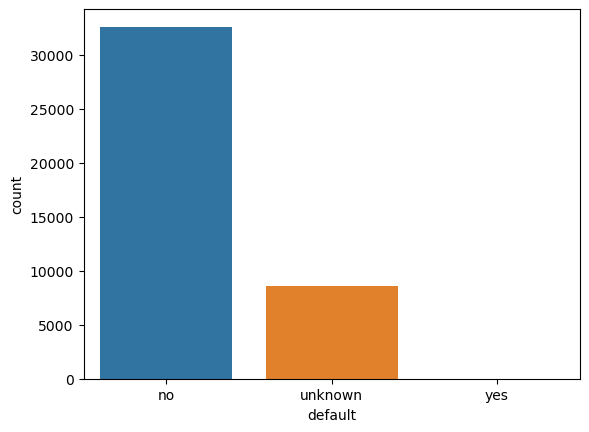

In [10]:
sns.countplot(data=df,x='default')

In [11]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [12]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [ ]:
sns.pairplot(data=df)

In [5]:
X = pd.get_dummies(df,dtype=np.float64)

In [6]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaled_X = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters=2,n_init='auto')

In [15]:
cluster_labels = model.fit_predict(scaled_X,)

In [16]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
X['Cluster'] = cluster_labels

In [18]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


<Axes: >

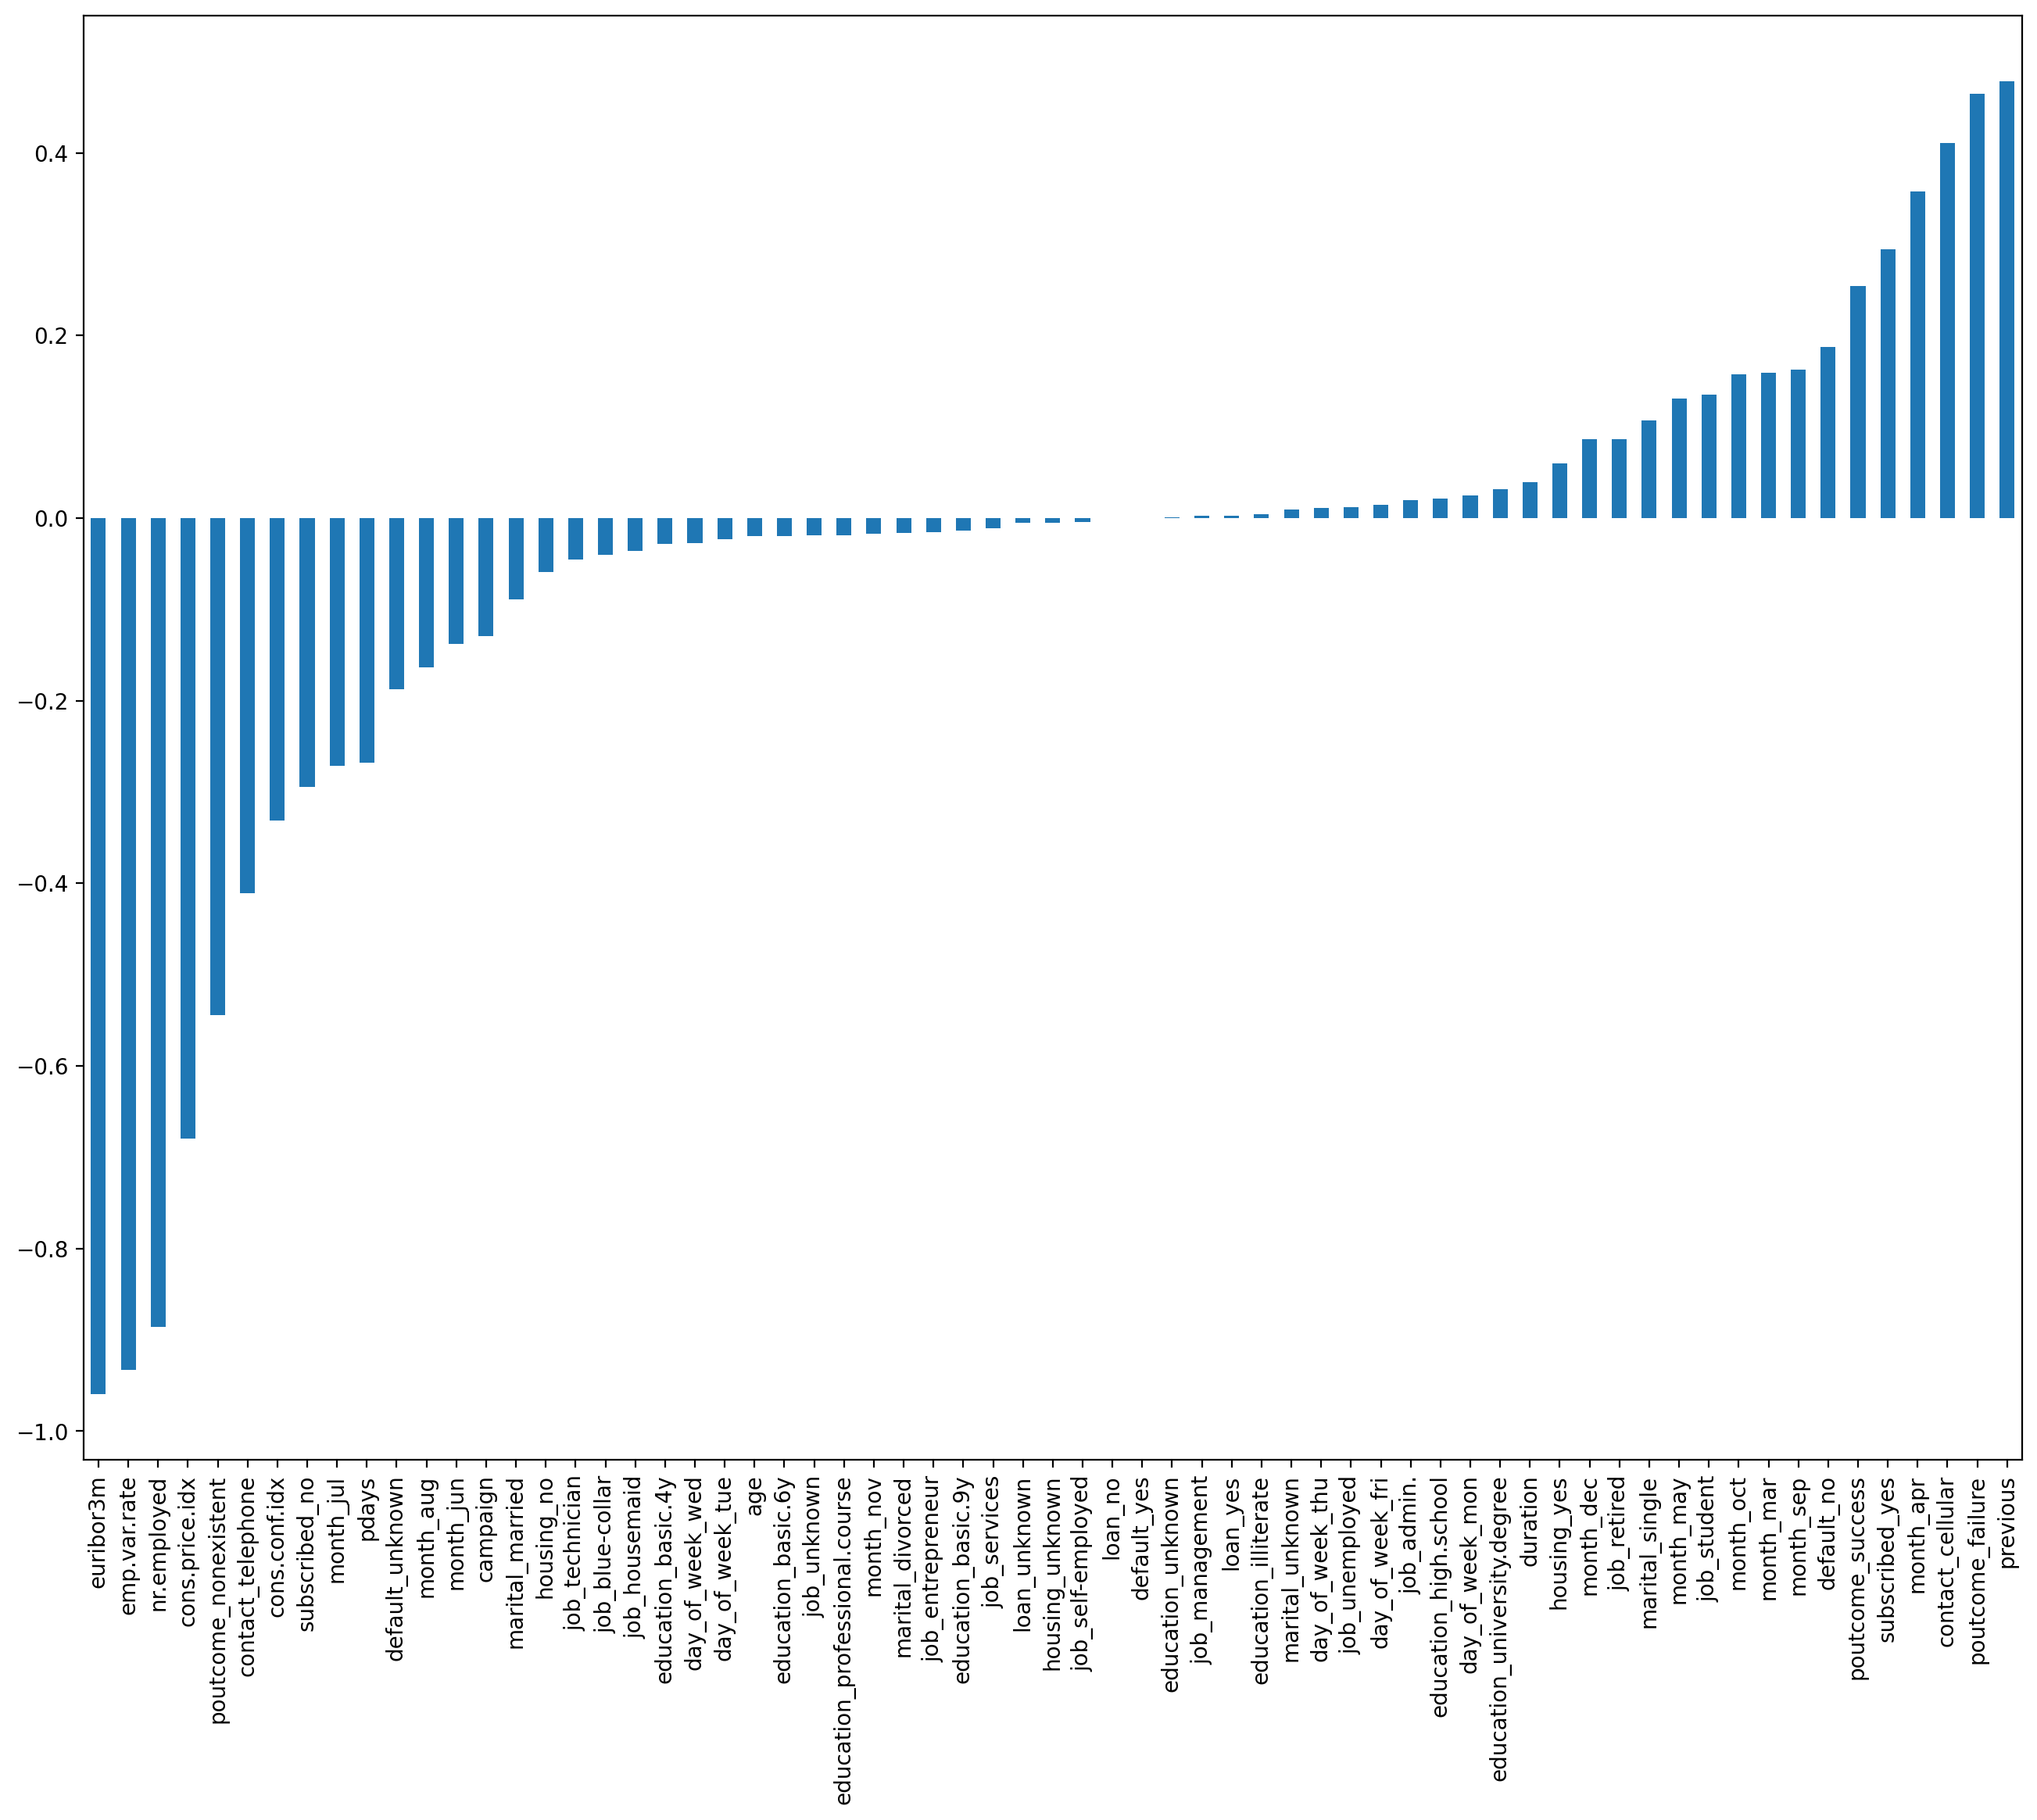

In [24]:
plt.figure(figsize=(16,12),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [25]:
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k,n_init='auto')
    model.fit(scaled_X)
    ssd.append(model.inertia_)   #it just means sum of squared distances between points and cluster center

In [26]:
ssd

[2469792.4571073186,
 2370787.879948266,
 2282648.4577248143,
 2240128.267231849,
 2167903.334120774,
 2111213.0380305033,
 2083547.0823977941,
 2045129.8469262468]

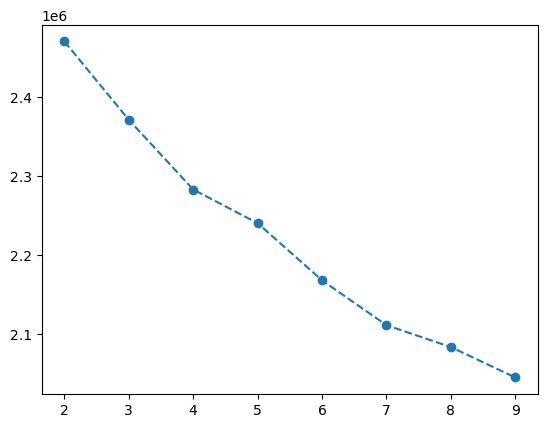

In [27]:
plt.plot(range(2,10),ssd,'o--')

In [29]:
pd.Series(ssd).diff()  #gives the difference between the row and its next row

0             NaN
1   -99004.577159
2   -88139.422223
3   -42520.190493
4   -72224.933111
5   -56690.296090
6   -27665.955633
7   -38417.235472
dtype: float64

#### Color Quantization

In [30]:
import matplotlib.image as mpimg

In [32]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [34]:
image_as_array.shape  #(H,W,C)

(1401, 934, 3)

In [41]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

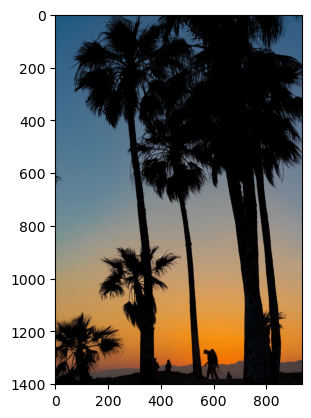

In [37]:
plt.figure(dpi=100)
plt.imshow(image_as_array)

In [38]:
# (H,W,C) -->  2D (H*W,C)

In [39]:
(h,w,c)  = image_as_array.shape

In [40]:
image_as_array2d  = image_as_array.reshape(h*w,c)

In [42]:
image_as_array2d.shape

(1308534, 3)

In [43]:
model = KMeans(n_clusters=6)

In [44]:
labels = model.fit_predict(image_as_array2d)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [48]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [49]:
rgb_codes

array([[ 71, 109, 138],
       [  3,   3,   4],
       [219, 135,  47],
       [137, 144, 144],
       [191, 155, 110],
       [ 67,  62,  62]])

In [50]:
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [52]:
quantized_image = np.reshape(rgb_codes[labels],(h,w,c))

In [54]:
#quantized_image

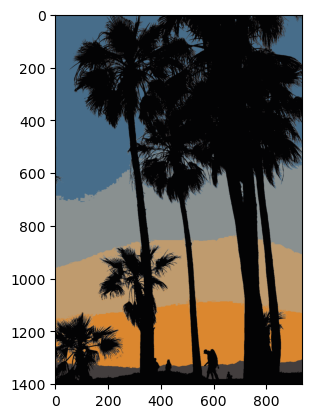

In [55]:
plt.imshow(quantized_image)